# Project 1, Part 5, Data Visualization



# Included Modules and Packages

Code cell containing your includes for modules and packages

In [1]:
import math
import numpy as np
import pandas as pd

import psycopg2

# Supporting code

Code cells containing any supporting code, such as connecting to the database, any functions, etc.  Remember you can use any code from the labs.

In [2]:
#
# function to run a select query and return rows in a pandas dataframe
# pandas puts all numeric values from postgres to float
# if it will fit in an integer, change it to integer
#

def my_select_query_pandas(query, rollback_before_flag, rollback_after_flag):
    "function to run a select query and return rows in a pandas dataframe"
    
    if rollback_before_flag:
        connection.rollback()
    
    df = pd.read_sql_query(query, connection)
    
    if rollback_after_flag:
        connection.rollback()
    
    # fix the float columns that really should be integers
    
    for column in df:
    
        if df[column].dtype == "float64":

            fraction_flag = False

            for value in df[column].values:
                
                if not np.isnan(value):
                    if value - math.floor(value) != 0:
                        fraction_flag = True

            if not fraction_flag:
                df[column] = df[column].astype('Int64')
    
    return(df)
    

In [3]:
connection = psycopg2.connect(
    user = "postgres",
    password = "ucb",
    host = "postgres",
    port = "5432",
    database = "postgres"
)

# 1.5 Example of a Data Visualization created using Python

The data science team would like for you to create an example of a data visualization using Python from data in a Pandas dataframe containing data from an SQL query.

Write 1 and only 1 query.  Note that the query may have as many subqueries, including "with" clauses, as you wish.  Any query of your choosing.  You can write a query from scratch.  You can use a query from a previous problem in this project.  You can use a query from the labs.  The idea is to come up with a query whose resulting data will make for an excellent quality data visualization. 

Ensure that when you check this Juptyer Notebook into GitHub that the query results in the Pandas dataframe are clearly visible in GitHub.  Note: When a query result has a large number of rows, Pandas will only display the first 5 rows, a row with ellipses, and the last 5 rows. This is ok.

Once you have the data in a Pandas dataframe, you may write as much Python code and use as many code cells as you wish to produce the data visualization.

You may only use Python modules that are currently installed in the Anaconda Docker container.  You may not install additional modules or any other software.

All work must be done in Docker in your VM in AWS.  You may not use any external data visualization systems, such as Tableau, etc.

You may use any code from the labs to pattern your code after, however for the data visualization, you cannot wholesale copy a data visualization from the labs.

Ensure that it is properly titled, including titles for axes if present.

Ensure that when you check this Juptyer Notebook into GitHub that the data visualization is clearly visible.  

If you want to use Google Maps for your data visualization, this is fine, however, the image will not show up in GitHub.  So, just save the image to an image file, include it in the repo, and add a markdown cell to display the image file. Also with Google Maps, do NOT check gmap_api_key.txt into GitHub for security reasons.  If the grader needs to run it, they will supply their own gmap_api_key.txt.


In [4]:
rollback_before_flag = True
rollback_after_flag = True

query = """

SELECT extract(month from sa.sale_date) as month_number,
    to_char(sa.sale_date, 'Month') as month,
    p.description as meal_name,
    sum(li.quantity) as total_meals_purchased
    
FROM sales as sa
    JOIN line_items as li
        ON sa.store_id = li.store_id AND sa.sale_id = li.sale_id
    JOIN products as p
        ON p.product_id = li.product_id

GROUP BY month_number, month, meal_name
ORDER BY month_number ASC

"""

df = my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)
df

,month_number,month,meal_name,total_meals_purchased
0,1,January,Brocolli Stir Fry,72161
1,1,January,Chicken Salad,18003
2,1,January,Curry Chicken,108134
3,1,January,Eggplant Lasagna,126605
4,1,January,Pistachio Salmon,144053
...,...,...,...,...
91,12,December,Eggplant Lasagna,134666
92,12,December,Pistachio Salmon,154242
93,12,December,Spinach Orzo,38297
94,12,December,Teriyaki Chicken,96896


In [5]:
# Use as many code cells as you need to create and display your data visualization


In [6]:
print("Unique meal_names:\n" + str(list(df['meal_name'].unique())))

Unique meal_names:
['Brocolli Stir Fry', 'Chicken Salad', 'Curry Chicken', 'Eggplant Lasagna', 'Pistachio Salmon', 'Spinach Orzo', 'Teriyaki Chicken', 'Tilapia Piccata']


In [7]:
print("Explore data types:\n" + str(df.dtypes))

Explore data types:
month_number              Int64
month                    object
meal_name                object
total_meals_purchased     Int64
dtype: object


In [8]:
# separate dataframe by meal_names

#'Pistachio Salmon'
salmon = df[df['meal_name'] == 'Pistachio Salmon'].set_index('month')
salmon['total_meals_purchased'] = salmon['total_meals_purchased'].astype('float')

#'Eggplant Lasagna'
lasagna = df[df['meal_name'] == 'Eggplant Lasagna'].set_index('month')
lasagna['total_meals_purchased'] = lasagna['total_meals_purchased'].astype('float')

#'Curry Chicken'
curry = df[df['meal_name'] == 'Curry Chicken'].set_index('month')
curry['total_meals_purchased'] = curry['total_meals_purchased'].astype('float')

#'Teriyaki Chicken'
teriyaki = df[df['meal_name'] == 'Teriyaki Chicken'].set_index('month')
teriyaki['total_meals_purchased'] = teriyaki['total_meals_purchased'].astype('float')

#'Brocolli Stir Fry'
brocolli = df[df['meal_name'] == 'Brocolli Stir Fry'].set_index('month')
brocolli['total_meals_purchased'] = brocolli['total_meals_purchased'].astype('float')

#'Tilapia Piccata'
piccata = df[df['meal_name'] == 'Tilapia Piccata'].set_index('month')
piccata['total_meals_purchased'] = piccata['total_meals_purchased'].astype('float')

#'Spinach Orzo'
spinach = df[df['meal_name'] == 'Spinach Orzo'].set_index('month')
spinach['total_meals_purchased'] = spinach['total_meals_purchased'].astype('float')

#'Chicken Salad'
salad = df[df['meal_name'] == 'Chicken Salad'].set_index('month')
salad['total_meals_purchased'] = salad['total_meals_purchased'].astype('float')
salad

,month_number,meal_name,total_meals_purchased
month,,,
January,1,Chicken Salad,18003.0
February,2,Chicken Salad,17597.0
March,3,Chicken Salad,20270.0
April,4,Chicken Salad,19084.0
May,5,Chicken Salad,18632.0
June,6,Chicken Salad,18691.0
July,7,Chicken Salad,18595.0
August,8,Chicken Salad,20920.0
September,9,Chicken Salad,17551.0


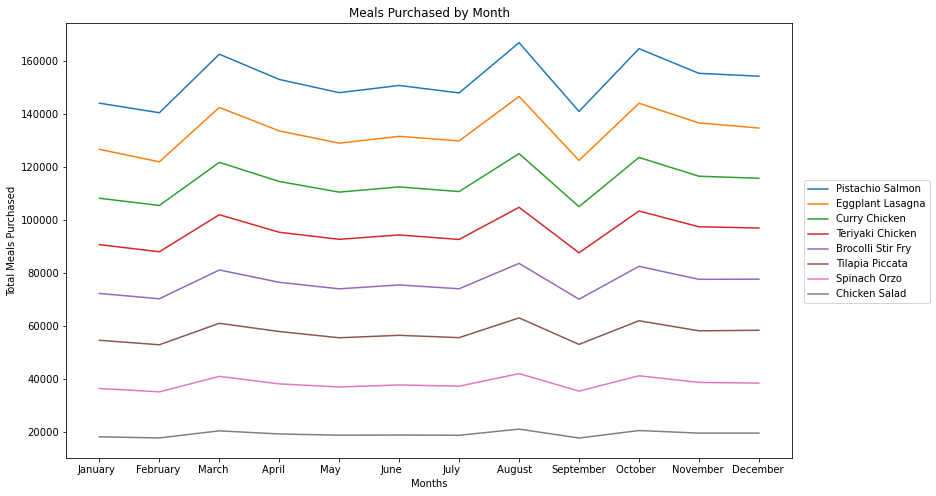

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(13,8))

ax.plot(salmon['total_meals_purchased'], label = 'Pistachio Salmon')
ax.plot(lasagna['total_meals_purchased'], label = 'Eggplant Lasagna')
ax.plot(curry['total_meals_purchased'], label = 'Curry Chicken')
ax.plot(teriyaki['total_meals_purchased'], label = 'Teriyaki Chicken')
ax.plot(brocolli['total_meals_purchased'], label = 'Brocolli Stir Fry')
ax.plot(piccata['total_meals_purchased'], label = 'Tilapia Piccata')
ax.plot(spinach['total_meals_purchased'], label = 'Spinach Orzo')
ax.plot(salad['total_meals_purchased'], label = 'Chicken Salad')

plt.title("Meals Purchased by Month")
plt.xlabel("Months")
plt.ylabel("Total Meals Purchased")
plt.legend(bbox_to_anchor = (1.01, 0.65))
plt.show()